In [97]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import OrdinalEncoder
from itertools import product
from ipywidgets import IntProgress
from IPython.display import display

pd.options.display.max_columns = 50
pd.options.mode.chained_assignment = None
%matplotlib inline

In [103]:
def log_progress(sequence, every=10):

    progress = IntProgress(min=0, max=len(sequence), value=0)
    display(progress)
    
    for index, record in enumerate(sequence):
        if index % every == 0:
            progress.value = index
        yield record
        

def fix_time(df):
    time = []
    date_fx = []
    months = {"Jan": 1, "Feb": 2, "Mar": 3,
              "Apr": 4, "May": 5, "Jun": 6,
              "Jul": 7, "Aug": 8, "Sep": 9,
              "Oct": 10, "Nov": 11, "Dec": 12
             }
    for date in df["date"]:
        mas = date.split()
        date_fx.append(datetime.date(int(mas[2][:-1]), months[mas[1]], int(mas[0])))
        podmas = mas[-1].split(":")
        time.append(datetime.time(int(podmas[0]), int(podmas[1]), 0))
    df["time"] = time
    df["date"] = date_fx
    
    
def fix_names1(players):
    ## Progress bar
    progress = IntProgress(min=0, max=len(players), value=0)
    display(progress)
    
    arr = []
    for i, x in enumerate(players['name']):
        surname = ''
        tmp = x.split(' ')
        if len(tmp) > 1:
            surname = tmp[-1]
            name = tmp[0][0] + '.'
            arr.append(surname + " " + name)
        else:
            arr.append(None)
        
        ## Progress fill
        if (i % 10 == 0):
            progress.value = i
        
    players['name'] = arr
    
def fix_names2(players):
    ## Progress bar
    progress = IntProgress(min=0, max=len(players), value=0)
    display(progress)
    arr = []
    for i, x in enumerate(players['name']):
        surname = ''
        tmp = x.split(' ')
        if len(tmp) > 1:
            surname = " ".join(tmp[1:])
            name = tmp[0][0] + '.'
            arr.append(surname + " " + name)
        else:
            arr.append(None)
            
        ## Progress fill
        if (i % 10 == 0):
            progress.value = i
    players['name'] = arr

def add_stats(df, players):
    progress = IntProgress(min=0, max=len(df), value=0)
    display(progress)
    df['p1_height'] = [None for x in range(len(df))]
    df['p1_age'] = [None for x in range(len(df))]
    df['p1_hand'] = [None for x in range(len(df))]
    df['p1_nation'] = [None for x in range(len(df))]
    df['p2_height'] = [None for x in range(len(df))]
    df['p2_age'] = [None for x in range(len(df))]
    df['p2_hand'] = [None for x in range(len(df))]
    df['p2_nation'] = [None for x in range(len(df))]
    arr1_player1 = []
    arr1_player2 = []
    arr2_player1 = []
    arr2_player2 = []
    arr3_player1 = []
    arr3_player2 = []
    arr4_player1 = []
    arr4_player2 = []
    arr5_player1 = []
    arr5_player2 = []
    for i in range(len(df)):
        try:
            player1 = players[df['player1'][i]:].head(1)
            arr1_player1.append(player1['height'][0])
            arr2_player1.append(player1['birth_date'][0])
            arr4_player1.append(player1['hand'][0])
            arr5_player1.append(player1['rank'][0])
            arr3_player1.append(player1['nationality'][0])
        except Exception:
            arr1_player1.append(df['p1_height'][i])
            arr2_player1.append(df['p1_age'][i])
            arr3_player1.append(df['p1_hand'][i])
            arr4_player1.append(df['p1_rank'][i])
            arr5_player1.append(df['p1_nation'][i])
            
        try:
            player2 = players[df['player2'][i]:].head(1)
            arr1_player2.append(player2['height'][0])
            arr2_player2.append(player2['birth_date'][0])
            arr4_player2.append(player2['hand'][0])
            arr5_player2.append(player2['rank'][0])
            arr3_player2.append(player2['nationality'][0])
        except Exception:
            arr1_player2.append(df['p2_height'][i])
            arr2_player2.append(df['p2_age'][i])
            arr3_player2.append(df['p2_hand'][i])
            arr4_player2.append(df['p2_rank'][i])
            arr5_player2.append(df['p2_nation'][i])
            
        ## Progress fill
        if (i % 10 == 0):
            progress.value = i
            
    df['p1_height'] = arr1_player1
    df['p2_height'] = arr1_player2
    df['p1_birth'] = arr2_player1
    df['p2_birth'] = arr2_player2
    df['p1_nation'] = arr3_player1
    df['p2_nation'] = arr3_player2
    df['p1_hand'] = arr4_player1
    df['p2_hand'] = arr4_player2

    
def fix_age(df, player_num):
    time = []
    date_fx = []
    months = {"Jan": 1, "Feb": 2, "Mar": 3,
              "Apr": 4, "May": 5, "Jun": 6,
              "Jul": 7, "Aug": 8, "Sep": 9,
              "Oct": 10, "Nov": 11, "Dec": 12
             }
    for date in df["p{0}_birth".format(str(player_num))]:
        if type(date) != float and date != None:
            mas = date.split()
            date_fx.append(datetime.date(int(mas[-1]), months[mas[1]], int(mas[0])))
        else:
            date_fx.append(None)
    df["p{0}_birth".format(str(player_num))] = date_fx

def invert_dataframe(df):    
    stats = ['p1_height', 'p1_birth', 'p1_nation', 'p1_hand', 'p1_points', 'p1_rank']
    for x in df.keys():
        if ('player1' in x or x == 'k1') and x != 'player1_win':
            name2 = x[:-1] + '2'
            tmp = df[x].copy()
            df[x]= df[name2]
            df[name2] = tmp
            
    for x in df.keys():
        if (x in stats):
            name2 = x.replace('1', '2')
            tmp = df[x].copy()
            df[x]= df[name2]
            df[name2] = tmp
    for i in range(len(df)): ## CAN BE IMPROVED
        if df['player1_win'][i] == 1:
            df['player1_win'][i] = 0
        else:
            df['player1_win'][i] = 1
            
    
"""def create_feature_all_matches_won_prc_p1(df):
    arr = [0 for x in range(len(df))]
    df = df.reset_index().set_index(['player1', 'date']).sort_index().reset_index()
    name = ''
    cnt_matches = 0
    cnt_wins = 0
    for i in range(len(df)):
        if (name == df['player1'][i]):
            cnt_matches += 1
            if (df['player1_win'][i] == 1):
                cnt_wins += 1
            arr[i] = cnt_wins / cnt_matches
        else:
            name = df['player1'][i]
            cnt_matches = 1
            cnt_wins = df['player1_win'][i]
            arr[i] = cnt_wins / cnt_matches
    return arr
    
def create_feature_all_matches_won_prc_p2(df):
    arr = [0 for x in range(len(df))]
    df = df.reset_index().set_index(['player2', 'date']).sort_index().reset_index()
    name = ''
    cnt_matches = 0
    cnt_wins = 0
    for i in range(len(df)):
        if (name == df['player2'][i]):
            cnt_matches += 1
            if (df['player1_win'][i] == 0):
                cnt_wins += 1
            arr[i] = cnt_wins / cnt_matches
        else:
            name = df['player2'][i]
            cnt_matches = 1
            cnt_wins = not df['player1_win'][i]
            arr[i] = cnt_wins / cnt_matches
    return arr"""
    

def create_aces_per_game(df):
    df['total_score_match_player1'] = df['score_set1_player1'].fillna(0)
    df['total_score_match_player2'] = df['score_set1_player2'].fillna(0)
    for x in range(2, 6):
        df['total_score_match_player1'] += df['score_set{0}_player1'.format(x)].fillna(0)
        df['total_score_match_player2'] += df['score_set{0}_player2'.format(x)].fillna(0)
    df['aces_per_game_player1'] = df['aces_match_player1'] / df['srv_games_player1']
    df['aces_per_game_player2'] = df['aces_match_player2'] / df['srv_games_player2']
    
def create_double_faults_per_game(df):
    df['df_per_game_player1'] = df['double_faults_match_player1'] / df['srv_games_player1']
    df['df_per_game_player2'] = df['double_faults_match_player2'] / df['srv_games_player2']
    
def create_feature_WSP(df):
    ## overall_winning_serve
    W1SP_p1 = df['first_serve_points_prc_match_common_player1']
    W2SP_p1 = df['second_serve_points_prc_match_common_player1']
    FS_p1 = df['first_serve_prc_match_common_player1']
    W1SP_p2 = df['first_serve_points_prc_match_common_player2']
    W2SP_p2 = df['second_serve_points_prc_match_common_player2']
    FS_p2 = df['first_serve_prc_match_common_player2']
    df['overall_winning_serve_prc_player1'] = W1SP_p1 * FS_p1 + W2SP_p1 * (1 - FS_p1)
    df['overall_winning_serve_prc_player2'] = W1SP_p2 * FS_p2 + W2SP_p2 * (1 - FS_p2)
    
def create_feature_WRP(df):
    df['winning_on_return_prc_player1'] = df['receiver_points_won_match_player1'] / df['points_won_match_player1']
    df['winning_on_return_prc_player2'] = df['receiver_points_won_match_player2'] / df['points_won_match_player2']

def create_feature_COMPLETE(df):
    df['complete_player1'] = df['winning_on_return_prc_common_player1'] * df['overall_winning_serve_prc_player1']
    df['complete_player2'] = df['winning_on_return_prc_common_player2'] * df['overall_winning_serve_prc_player2']
    
def create_feature_SERVEADV(df):
    df['serve_advantage_player1'] = df['overall_winning_serve_prc_player1'] - df['winning_on_return_prc_common_player2']
    df['serve_advantage_player2'] = df['overall_winning_serve_prc_player2'] - df['winning_on_return_prc_common_player1']
    
def create_diff_features(df):
    arr = ['first_serve_prc_match_common_player1', 'first_serve_points_prc_match_common_player1',
      'second_serve_points_prc_match_common_player1', 'winning_on_return_prc_common_player1',
      'aces_per_game_common_player1', 'df_per_game_common_player1', 'break_points_prc_match_common_player1']
    for stat in arr:
        df[stat.replace('player1', '') + '_dif'] = df[stat] - df[stat.replace('1', '2')]
    

## FINISHED
def create_retirement_stat(df):
    players = list(set(df['player1']) or set(df['player2']))
    arr1 = [0 for x in range(len(df))]
    arr2 = [0 for x in range(len(df))]
    ## Progress bar
    progress = IntProgress(min=0, max=len(players), value=0)
    display(progress)
    for k, player in enumerate(players):
        subset = df[(df['player1'] == player) | (df['player2'] == player)]
        for i in range(1, len(subset)):
            if len(subset) > 1:
                player1 = list(subset['player1'])
                status = list(subset['status'])
                player2 = list(subset['player2'])
                fl = list(subset['player1_win'])
                if (player1[i] == player):    
                    if ((status[i - 1] == 'Retired') and (player1[i - 1] == player) and (fl[i - 1] == 0)):
                        arr1[subset.index[i]] = 1
                    if ((status[i - 1] == 'Retired') and (player2[i - 1] == player) and (fl[i - 1] == 1)):
                        arr1[subset.index[i]] = 1
                else:
                    if ((status[i - 1] == 'Retired') and (player1[i - 1] == player) and (fl[i - 1] == 0)):
                        arr2[subset.index[i]] = 1
                    if ((status[i - 1] == 'Retired') and (player2[i - 1] == player) and (fl[i - 1] == 1)):
                        arr2[subset.index[i]] = 1
                        
        ## Progress fill
        if (k % 10 == 0):
            progress.value = k
    df['1st_match_since_retirement_player1'] = arr1
    df['1st_match_since_retirement_player2'] = arr2
    
## FINISHED (df - DataFrame, stats - array of stats, include only player1 stats)
def create_common_stats(df, stats):
    for stat in stats:
        print("CREATING STAT {0}_common...".format(stat.replace('player1', '')))
        arr1 = [0 for x in range(len(df))]
        arr2 = [0 for x in range(len(df))]
        stat_p1 = stat
        stat_p2 = stat.replace('1', '2')
        df_dropped = df[(df[stat_p1] == df[stat_p1])] ## df after dropping Nan
        
        progress = IntProgress(min=0, max=len(df_dropped), value=0)
        display(progress)
        
        for i in range(len(df_dropped)):
            df_tmp = df_dropped[df_dropped['date'] <= list(df_dropped['date'])[i]]
            players_p1 = set(df_tmp[df_tmp['player1'] == (list(df_tmp['player1'])[i])]['player2']) | set(df_tmp[df_tmp['player2'] == (list(df_tmp['player1'])[i])]['player1'])
            players_p2 = set(df_tmp[df_tmp['player1'] == (list(df_tmp['player2'])[i])]['player2']) | set(df_tmp[df_tmp['player2'] == (list(df_tmp['player2'])[i])]['player1'])
            common_players = players_p1 & players_p2 ## common opponents
            wrp1 = 0
            wrp1_cnt = 0
            wrp2 = 0
            wrp2_cnt = 0
            for p in common_players:
                wrp1 += df_tmp[(df_tmp['player1'] == list(df_tmp['player1'])[i]) & (df_tmp['player2'] == p)][stat_p1].sum()
                wrp1_cnt += len(df_tmp[(df_tmp['player1'] == list(df_tmp['player1'])[i]) & (df_tmp['player2'] == p)])
                wrp1 += df_tmp[(df_tmp['player2'] == list(df_tmp['player1'])[i]) & (df_tmp['player1'] == p)][stat_p2].sum()
                wrp1_cnt += len(df_tmp[(df_tmp['player2'] == list(df_tmp['player1'])[i]) & (df_tmp['player1'] == p)])

                wrp2 += df_tmp[(df_tmp['player1'] == list(df_tmp['player2'])[i]) & (df_tmp['player2'] == p)][stat_p1].sum()
                wrp2_cnt += len(df_tmp[(df_tmp['player1'] == list(df_tmp['player2'])[i]) & (df_tmp['player2'] == p)])
                wrp2 += df_tmp[(df_tmp['player2'] == list(df_tmp['player2'])[i]) & (df_tmp['player1'] == p)][stat_p2].sum()
                wrp2_cnt += len(df_tmp[(df_tmp['player2'] == list(df_tmp['player2'])[i]) & (df_tmp['player1'] == p)])
            if (wrp1_cnt != 0):
                wrp1 /= wrp1_cnt
                wrp2 /= wrp2_cnt
                arr1[df_tmp['player1'].index[i]] = wrp1
                arr2[df_tmp['player2'].index[i]] = wrp2
            
            ## Progress fill
            if (i % 10 == 0):
                progress.value = i

        print("STAT {0}common CREATED".format(stat.replace('player1', '')))
        df[stat_p1 + '_common'] = arr1
        df[stat_p2 + '_common'] = arr2
    
def percentile(n):
    '''Calculate n - percentile of data'''
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'pctl%s' % n
    return percentile_

def lagged_features(df
    ,target_var = ['aces_match_player1']
    , lags = [1]
    , windows = [28]
    , aggregation_methods = {'mean', 'median', percentile(10), percentile(90)}
    , surface_type_filter = [1, -1]):
    ## with no surface type filter
    players = ['player1', 'player2']
    df = df.reset_index()
    for p in players:
        if -1 in surface_type_filter:
            for l, w, t in product(lags, windows, target_var):
                t1 = t
                if p == 'player2':
                    t1 = t1.replace("player1", "player2")
                lf_df = df.set_index(['player1', 'player2', 'date'])[t1].\
                         groupby(level=p).apply(lambda x: x.rolling(window=w, min_periods = 1).agg(aggregation_methods).shift(l))
                t1 = t1.replace("player1", "").replace("player2", "")
                new_names = {x: "{0}_lag_{1}_{2}_{3}_{4}".
                              format(p.replace("player", "p"), l, t1, x, w) for x in lf_df.columns}

                df = df.merge(lf_df.reset_index().rename(columns = new_names),
                    how='left', on =['player1', 'player2', 'date'] )
        ## with surface type filter
        if 1 in surface_type_filter:
            for l, w, t in product(lags, windows, target_var):
                t1 = t
                if p == 'player2':
                    t1 = t1.replace("player1", "player2")
                df.head()
                lf_df = df.set_index(['player1', 'player2', 'date', 'Surface'])[t1].\
                         groupby(level=[p, 'Surface']).apply(lambda x: x.rolling(window=w, min_periods = 1).agg(aggregation_methods).shift(l))
                t1 = t1.replace("player1", "").replace("player2", "")
                new_names = {x: "{0}_filter_lag_{1}_{2}_{3}_{4}".
                              format(p.replace("player", "p"), l, t1, x, w) for x in lf_df.columns}

                df = df.merge(lf_df.reset_index().rename(columns = new_names),
                    how='left', on =['player1', 'player2', 'date', 'Surface'])
    return df



In [99]:
## read data
print("LOADING DATA...")
df = pd.read_pickle('matches.pkl') 
players1 = pd.read_pickle('players.pkl')
players2 = pd.read_pickle('players.pkl')
print("DATA LOADED")

## fix players' names for transporting stats
print("FIXING PLAYERS' NAMES...")
fix_names1(players1)
fix_names2(players2)
players1 = players1.set_index(['name'])
players2 = players2.set_index(['name'])
print("PLAYERS' NAMES FIXED")

## transporting stats players --> dataframe
print("IMPORTING STATIC STATS...")
add_stats(df, players1)
add_stats(df, players2)
print("STATIC STATS IMPORTED")

## drop Nan stats
df = df.dropna(subset=['p1_height'])
df = df.dropna(subset=['p2_height'])
df = df.dropna(subset=['p1_birth'])
df = df.dropna(subset=['p2_birth'])
df = df.set_index("player1").reset_index()

## create retirement stat
print("CREATING STAT RETIREMENT...")
create_retirement_stat(df)
print("STAT RETIREMENT CREATED")


## converting age to datetime
fix_age(df, 1)
fix_age(df, 2)

## converting some stats to datetime in df for the next steps
df['date'] = pd.to_datetime(df['date'])
df['p1_birth'] = pd.to_datetime(df['p1_birth'])
df['p2_birth'] = pd.to_datetime(df['p2_birth'])

# count prc of winning points on return
create_feature_WRP(df)

## normalize to per_game stats
create_aces_per_game(df)
create_double_faults_per_game(df)


## create stats based on common opponents
print("CREATING STATS BASED ON COMMON OPPONENTS...")
stats = ['first_serve_prc_match_player1', 'first_serve_points_prc_match_player1',
         'second_serve_points_prc_match_player1', 'winning_on_return_prc_player1',
        'aces_per_game_player1', 'df_per_game_player1', 'break_points_prc_match_player1']
create_common_stats(df, stats)
print("STATS BASED ON COMMON OPPONENTS CREATED")


## create new features
create_feature_WSP(df)
create_feature_COMPLETE(df)
create_feature_SERVEADV(df)

## add invert matches
print("ADDING INVERT MATCHES...")
df_copy = df.copy()
invert_dataframe(df_copy)
df = df.reset_index()
df = df.set_index(["player1", "player2"])
df_copy = df_copy.set_index(["player1", "player2"])
df = df.append(df_copy)
## df['all_matches_won_prc_player1'] = create_feature_all_matches_won_prc_p1(df)
## df['all_matches_won_prc_player2'] = create_feature_all_matches_won_prc_p2(df)
df = df.reset_index()
df = df.set_index(['date', 'player1', 'player2'])
df = df.sort_index()
print("INVERT MATCHES ADDED")
print(df.shape)
df.head(3)

LOADING DATA...
DATA LOADED
FIXING PLAYERS' NAMES...


IntProgress(value=0, max=1357)

IntProgress(value=0, max=1357)

PLAYERS' NAMES FIXED
IMPORTING STATIC STATS...


IntProgress(value=0, max=19511)

IntProgress(value=0, max=19511)

STATIC STATS IMPORTED
CREATING STAT RETIREMENT...


IntProgress(value=0, max=624)

STAT RETIREMENT CREATED
CREATING STATS BASED ON COMMON OPPONENTS...
CREATING STAT first_serve_prc_match__common...


IntProgress(value=0, max=8177)

STAT first_serve_prc_match_common CREATED
CREATING STAT first_serve_points_prc_match__common...


IntProgress(value=0, max=8177)

STAT first_serve_points_prc_match_common CREATED
CREATING STAT second_serve_points_prc_match__common...


IntProgress(value=0, max=8177)

STAT second_serve_points_prc_match_common CREATED
CREATING STAT winning_on_return_prc__common...


IntProgress(value=0, max=8177)

STAT winning_on_return_prc_common CREATED
CREATING STAT aces_per_game__common...


IntProgress(value=0, max=8337)

STAT aces_per_game_common CREATED
CREATING STAT df_per_game__common...


IntProgress(value=0, max=8161)

STAT df_per_game_common CREATED
CREATING STAT break_points_prc_match__common...


IntProgress(value=0, max=8178)

STAT break_points_prc_match_common CREATED
STATS BASED ON COMMON OPPONENTS CREATED


KeyError: 'first_serve_points_prc_match_common_player1'

In [104]:
## temp decision
# df.rename(columns={"first_serve_prc_match_player1_common": "first_serve_prc_match_common_player1",
#                    "first_serve_prc_match_player2_common": "first_serve_prc_match_common_player2",
#                    "first_serve_points_prc_match_player1_common": "first_serve_points_prc_match_common_player1",
#                   "first_serve_points_prc_match_player2_common": "first_serve_points_prc_match_common_player2",
#                    "second_serve_points_prc_match_player1_common": "second_serve_points_prc_match_common_player1",
#                   "second_serve_points_prc_match_player2_common": "second_serve_points_prc_match_common_player2",
#                   "winning_on_return_prc_player1_common": "winning_on_return_prc_common_player1",
#                   "winning_on_return_prc_player2_common": "winning_on_return_prc_common_player2",
#                   "aces_per_game_player1_common": "aces_per_game_common_player1",
#                   "aces_per_game_player2_common": "aces_per_game_common_player2",
#                   "df_per_game_player1_common": "df_per_game_common_player1",
#                   "df_per_game_player2_common": "df_per_game_common_player2",
#                   "break_points_prc_match_player1_common": "break_points_prc_match_common_player1",
#                   "break_points_prc_match_player2_common": "break_points_prc_match_common_player2"}, inplace=True)


## create new features
create_feature_WSP(df)
create_feature_COMPLETE(df)
create_feature_SERVEADV(df)
create_diff_features(df)

## add invert matches
print("ADDING INVERT MATCHES...")
df_copy = df.copy()
invert_dataframe(df_copy)
df = df.reset_index()
df = df.set_index(["player1", "player2"])
df_copy = df_copy.set_index(["player1", "player2"])
df = df.append(df_copy)
## df['all_matches_won_prc_player1'] = create_feature_all_matches_won_prc_p1(df)
## df['all_matches_won_prc_player2'] = create_feature_all_matches_won_prc_p2(df)
df = df.reset_index()
df = df.set_index(['date', 'player1', 'player2'])
df = df.sort_index()
print("INVERT MATCHES ADDED")
print(df.shape)
df.head(3)

ADDING INVERT MATCHES...
INVERT MATCHES ADDED
(27688, 271)


index  \
date       player1     player2              
2015-06-01 Chardy J.   Murray A.      NaN   
           Djokovic N. Gasquet R.     2.0   
           Gasquet R.  Djokovic N.    NaN   

                                                                            match_url  \
date       player1     player2                                                          
2015-06-01 Chardy J.   Murray A.      https://www.sofascore.com/chardy-murray/BcgsEqg   
           Djokovic N. Gasquet R.   https://www.sofascore.com/djokovic-gasquet/oNf...   
           Gasquet R.  Djokovic N.  https://www.sofascore.com/djokovic-gasquet/oNf...   

                                   status Surface    k1     k2  player1_win  \
date       player1     player2                                                
2015-06-01 Chardy J.   Murray A.    Ended    Clay   8.0   1.08            0   
           Djokovic N. Gasquet R.   Ended    Clay   1.0  19.00            1   
           Gasquet R.  Djokovic N.  Ended    Clay  19.0   1.00            0   

                                    round match_duration_mnt Location  \
date       player1     player2                                          
2015-06-01 Chardy J.   Murray A.    (R16)                173      NaN   
           Djokovic N. Gasquet R.   (R16)                121      NaN   
           Gasquet R.  Djokovic N.  (R16)                121      NaN   

                                    duration_set1  duration_set2  \
date       player1     player2                                     
2015-06-01 Chardy J.   Murray A.             39.0           50.0   
           Djokovic N. Gasquet R.            38.0           39.0   
           Gasquet R.  Djokovic N.           38.0           39.0   

                                    duration_set3  duration_set4  \
date       player1     player2                                     
2015-06-01 Chardy J.   Murray A.             41.0           41.0   
           Djokovic N. Gasquet R.            43.0            NaN   
           Gasquet R.  Djokovic N.           43.0            NaN   

                                    duration_set5  aces_match_player1  \
date       player1     player2                                          
2015-06-01 Chardy J.   Murray A.              NaN                 NaN   
           Djokovic N. Gasquet R.             NaN                 NaN   
           Gasquet R.  Djokovic N.            NaN                 NaN   

                                    aces_match_player2  \
date       player1     player2                           
2015-06-01 Chardy J.   Murray A.                   NaN   
           Djokovic N. Gasquet R.                  NaN   
           Gasquet R.  Djokovic N.                 NaN   

                                    double_faults_match_player1  \
date       player1     player2                                    
2015-06-01 Chardy J.   Murray A.                            NaN   
           Djokovic N. Gasquet R.                           NaN   
           Gasquet R.  Djokovic N.                          NaN   

                                    double_faults_match_player2  \
date       player1     player2                                    
2015-06-01 Chardy J.   Murray A.                            NaN   
           Djokovic N. Gasquet R.                           NaN   
           Gasquet R.  Djokovic N.                          NaN   

                                    first_serve_prc_match_player1  \
date       player1     player2                                      
2015-06-01 Chardy J.   Murray A.                              NaN   
           Djokovic N. Gasquet R.                             NaN   
           Gasquet R.  Djokovic N.                            NaN   

                                    first_serve_prc_match_player2  \
date       player1     player2                                      
2015-06-01 Chardy J.   Murray A.                              NaN   
           Djokovic N. Gasquet R.     

In [105]:
df.tail(2)

index  \
date       player1     player2                
2020-11-22 Medvedev D. Thiem D.     13843.0   
           Thiem D.    Medvedev D.      NaN   

                                                                            match_url  \
date       player1     player2                                                          
2020-11-22 Medvedev D. Thiem D.     https://www.sofascore.com/thiem-medvedev/Yzrsevpb   
           Thiem D.    Medvedev D.  https://www.sofascore.com/thiem-medvedev/Yzrsevpb   

                                   status           Surface    k1    k2  \
date       player1     player2                                            
2020-11-22 Medvedev D. Thiem D.     Ended  Hardcourt indoor  1.66  2.20   
           Thiem D.    Medvedev D.  Ended  Hardcourt indoor  2.20  1.66   

                                    player1_win  round match_duration_mnt  \
date       player1     player2                                              
2020-11-22 Medvedev D. Thiem D.               1  Final                162   
           Thiem D.    Medvedev D.            0  Final                162   

                                   Location  duration_set1  duration_set2  \
date       player1     player2                                              
2020-11-22 Medvedev D. Thiem D.     London            48.0           61.0   
           Thiem D.    Medvedev D.  London            48.0           61.0   

                                    duration_set3  duration_set4  \
date       player1     player2                                     
2020-11-22 Medvedev D. Thiem D.              52.0            NaN   
           Thiem D.    Medvedev D.           52.0            NaN   

                                    duration_set5  aces_match_player1  \
date       player1     player2                                          
2020-11-22 Medvedev D. Thiem D.               NaN                12.0   
           Thiem D.    Medvedev D.            NaN                 7.0   

                                    aces_match_player2  \
date       player1     player2                           
2020-11-22 Medvedev D. Thiem D.                    7.0   
           Thiem D.    Medvedev D.                12.0   

                                    double_faults_match_player1  \
date       player1     player2                                    
2020-11-22 Medvedev D. Thiem D.                             3.0   
           Thiem D.    Medvedev D.                          1.0   

                                    double_faults_match_player2  \
date       player1     player2                                    
2020-11-22 Medvedev D. Thiem D.                             1.0   
           Thiem D.    Medvedev D.                          3.0   

                                    first_serve_prc_match_player1  \
date       player1     player2                                      
2020-11-22 Medvedev D. Thiem D.                          0.754545   
           Thiem D.    Medvedev D.                       0.863248   

                                    first_serve_prc_match_player2  \
date       player1     player2                                      
2020-11-22 Medvedev D. Thiem D.                          0.863248   
           Thiem D.    Medvedev D.                       0.754545   

                                    first_serve_cnt_match_player1  \
date       player1     player2                                      
2020-11-22 Medvedev D. Thiem D.                              83.0   
           Thiem D.    Medvedev D.                          101.0   

                                    first_serve_cnt_match_player2  \
date       player1     player2                                      
2020-11-22 Medvedev D. Thiem D.                             101.0   
           Thiem D.    Medvedev D.                           83.0   

                                    second_serve_prc_match_player1  \
date       player1     player2                            

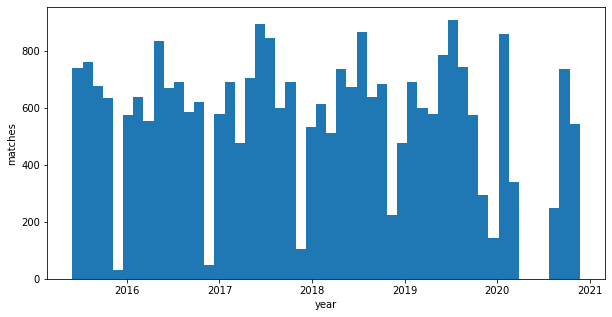

In [106]:
plt.figure(figsize=(10, 5))
plt.ylabel("matches")
plt.xlabel("year")
plt.hist(df.index.get_level_values('date'), bins=50);

In [107]:
df['p1_age'] = (df.index.get_level_values('date') - df['p1_birth']).dt.days / 365
df['p2_age'] = (df.index.get_level_values('date') - df['p2_birth']).dt.days / 365

In [108]:
df['p1_birthday_today'] = \
    (df['p1_birth'].dt.month == df.index.get_level_values('date').month) & \
    (df['p1_birth'].dt.day == df.index.get_level_values('date').day)

df['p2_birthday_today'] = \
    (df['p2_birth'].dt.month == df.index.get_level_values('date').month) & \
    (df['p2_birth'].dt.day == df.index.get_level_values('date').day)

In [109]:
df['hour'] = df['time'].map(lambda x: x.hour)

In [110]:
df['Surface'] = df['Surface'].fillna('N/A')

surface_encoder = OrdinalEncoder()
df['Surface'] = surface_encoder.fit_transform(df['Surface'].values.reshape(-1,1)); ## Clay - 0.0, Grass - 1.0, Hard outdoor - 3.0, Hard court indoor - 2.0 

In [111]:
df['round'] = df['round'].fillna('N/A')

round_encoder = OrdinalEncoder()
df['round'] = round_encoder.fit_transform(df['round'].values.reshape(-1,1));
df.rename(columns={"match_duration_mnt": "match_dur"}, inplace=True)

In [124]:
stats = []
for x in df.keys():
    ## if ('match' in x and 'player1' in x) or ('set' in x and 'player1' in x) or ('bp' in x):
    if ('match' in x and 'player1' in x) or ('bp' in x):
        stats.append(x)
stats.pop(0)
stats.pop(stats.index('1st_match_since_retirement_player1'))
df_new = lagged_features(df, target_var=stats, aggregation_methods=['mean', 'median', percentile(90), percentile(10)])
df_new = lagged_features(df_new, target_var=['match_dur'], windows=[7], aggregation_methods=['mean', 'median', percentile(90), percentile(10)])


/Users/yasha_ten/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [130]:
# df_new.rename(columns={"player1": "p1", "player2": "p2", "player1_win": "p1_win"}, inplace=True)
df_new.rename(columns={"player1": "p1", "player2": "p2", "player1_win": "p1_win"}, inplace=True)

In [155]:
import math
for x in df_new.keys():
    if 'lag' in x:
        if math.inf in df_new[x]:
            print(1)
            break
        print(2)

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [131]:
df_new = df_new.set_index(["date", "p1", "p2"])
# df = df.set_index(["date", "p1", "p2"])

In [162]:
features_from = '2015-01-01'

cols2keep = [
    'Surface', 'hour', 'round', 'p1_win',
    'p1_age', 'p2_age', 'p1_height', 'p2_height',
    'p1_birthday_today', 'p2_birthday_today', 'overall_winning_serve_prc_player1',
    'overall_winning_serve_prc_player2', 'complete_player1', 'complete_player2',
    'serve_advantage_player1', 'serve_advantage_player2', 'p1_rank', 'p2_rank',
    'p1_points', 'p2_points']

for x in df_new.keys():
    if 'lag' in x:
        cols2keep.append(x)

for x in df_new.keys():
    if 'common' in x and 'lag' not in x:
        cols2keep.append(x)

data = df_new.loc[df_new.index.get_level_values('date') > features_from, cols2keep] \
    .dropna(subset=['p1_win'])
print(data.shape[1])
data.head(3)

393


Surface  hour  round  p1_win     p1_age  \
date       p1          p2                                                     
2015-06-01 Chardy J.   Murray A.        0.0    13    1.0       0  28.317808   
           Djokovic N. Gasquet R.       0.0    18    1.0       1  28.046575   
           Gasquet R.  Djokovic N.      0.0    18    1.0       0  28.972603   

                                       p2_age  p1_height  p2_height  \
date       p1          p2                                             
2015-06-01 Chardy J.   Murray A.    28.065753       1.88       1.91   
           Djokovic N. Gasquet R.   28.972603       1.88       1.83   
           Gasquet R.  Djokovic N.  28.046575       1.83       1.88   

                                    p1_birthday_today  p2_birthday_today  \
date       p1          p2                                                  
2015-06-01 Chardy J.   Murray A.                False              False   
           Djokovic N. Gasquet R.               False              False   
           Gasquet R.  Djokovic N.              False              False   

                                    overall_winning_serve_prc_player1  \
date       p1          p2                                               
2015-06-01 Chardy J.   Murray A.                                  0.0   
           Djokovic N. Gasquet R.                                 0.0   
           Gasquet R.  Djokovic N.                                0.0   

                                    overall_winning_serve_prc_player2  \
date       p1          p2                                               
2015-06-01 Chardy J.   Murray A.                                  0.0   
           Djokovic N. Gasquet R.                                 0.0   
           Gasquet R.  Djokovic N.                                0.0   

                                    complete_player1  complete_player2  \
date       p1          p2                                                
2015-06-01 Chardy J.   Murray A.                 0.0               0.0   
           Djokovic N. Gasquet R.                0.0               0.0   
           Gasquet R.  Djokovic N.               0.0               0.0   

                                    serve_advantage_player1  \
date       p1          p2                                     
2015-06-01 Chardy J.   Murray A.                        0.0   
           Djokovic N. Gasquet R.                       0.0   
           Gasquet R.  Djokovic N.                      0.0   

                                    serve_advantage_player2  p1_rank  p2_rank  \
date       p1          p2                                                       
2015-06-01 Chardy J.   Murray A.                        0.0       37        3   
           Djokovic N. Gasquet R.                       0.0        1       19   
           Gasquet R.  Djokovic N.                      0.0       19        1   

                                    p1_points  p2_points  \
date       p1          p2                                  
2015-06-01 Chardy J.   Murray A.         1120       7040   
           Djokovic N. Gasquet R.       13845       1715   
           Gasquet R.  Djokovic N.       1715      13845   

                                    p1_lag_1_double_faults_match__mean_28  \
date       p1          p2                                                   
2015-06-01 Chardy J.   Murray A.                                      NaN   
           Djokovic N. Gasquet R.                                     NaN   
           Gasquet R.  Djokovic N.                                    NaN   

                                    p1_lag_1_double_faults_match__median_28  \
date       p1          p2                                                     
2015-06-01 Chardy J.   Murray A.                                        NaN   
           Djokovic N. Gasquet R.                                       NaN   
           Gasquet R.  Djokovic N.                                      NaN

In [163]:
data.to_pickle('lol_data_nok1k2.pkl')

In [158]:
data.to_pickle("final_data_common_lag_ranks.pkl")

In [ ]:
## lag1
## _mdur(исходная статистика)
## _method
## _window
## _surfacetype(all, surface_name)

In [ ]:
## Информация о players:
## 148 players len(name + surname) > 2
## 1217 players len(name + surname) == 2
## 11 countries, not players
## Идея: сначала сделать fix_name по принципу: берем последнее слово из player1.split() в качестве фамилии, а затем fix_name:
## берем все слова с первого из player1.split() в качестве фамилии
## Итог: Выкинуто 50 игроков и их матчи(почти все малоизвестные)

In [ ]:
## НЕПРИЯТНО: у 6к матчей нет k1 k2(матчи в 2014) - по сути дроп всех матчей 2014 года